In [1]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import cv2 
from tqdm import tqdm
import os

# 📁 Created Data ---> CSV. file 

### 🌀Save to CSV.

In [2]:
Table_path_ = pd.read_csv('/media/SSD/Data_photogram_Pcar/Dataset_3DCar.csv')
print(Table_path_.shape)
Table_path_.head()

(397967, 11)


,Unnamed: 0.1,Unnamed: 0,ID,Damage,p,FileName,distance,Angle,img_path,Fold,path_train
0,0,0,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8.png,dis1.9,Angle0,/media/SSD/Data_photogram_car/id10/Base/p1/dis...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
1,1,1,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D1.png,dis1.9,Angle0,/media/SSD/Data_photogram_car/id10/Base/p1/dis...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
2,2,2,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D2.png,dis1.9,Angle0,/media/SSD/Data_photogram_car/id10/Base/p1/dis...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
3,3,3,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D3.png,dis1.9,Angle0,/media/SSD/Data_photogram_car/id10/Base/p1/dis...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
4,4,4,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D4.png,dis1.9,Angle0,/media/SSD/Data_photogram_car/id10/Base/p1/dis...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...


#### 🚨 Chang path

From 

``/media/SSD/Data_photogram_car`` 

to 

``/home/kannika/Data_photogram_car``


In [4]:
Table_path_['img_path'].tolist()

['/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D1.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D2.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D3.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D4.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U1.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U2.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U3.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U4.png',
 '/media/SSD/Data_photogram_car/id10/Base/p1/dis1.9/Angle0L1/id10-Base_p1_dis1.9_angle0L1_elev8.png',


In [5]:
root_ssd = '/media/SSD/Data_photogram_car'
root_os = '/home/kannika/Data_photogram_car'

Table_path_['img_path']= Table_path_['img_path'].str.replace(root_ssd, root_os)
Table_path_.head()

,Unnamed: 0.1,Unnamed: 0,ID,Damage,p,FileName,distance,Angle,img_path,Fold,path_train
0,0,0,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
1,1,1,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D1.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
2,2,2,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D2.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
3,3,3,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D3.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
4,4,4,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D4.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...


In [6]:
Table_path_['img_path'].tolist()

['/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D1.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D2.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D3.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8D4.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U1.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U2.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U3.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0/id10-Base_p1_dis1.9_angle0_elev8U4.png',
 '/home/kannika/Data_photogram_car/id10/Base/p1/dis1.9/Angle0L1/id10-Base_p

In [7]:
###Save
Table_path_.to_csv('/media/SSD/Data_photogram_Pcar/Dataset_3DCar_OS.csv')

--------------------------------------------------------------------------------------------------------------

In [47]:
Table_path_ = pd.read_csv('/media/SSD/Data_photogram_Pcar/Dataset_3DCar_OS.csv')
print(Table_path_.shape)
Table_path_.head()

(397967, 12)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Damage,p,FileName,distance,Angle,img_path,Fold,path_train
0,0,0,0,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
1,1,1,1,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D1.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
2,2,2,2,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D2.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
3,3,3,3,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D3.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
4,4,4,4,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D4.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...


## 🐥 Check Image in Directory

Images Name : **id6-Severe_p12_dis1.75I2_angle223R2_elev15D1.png, --> Shape  (512, 512, 3)
image size: 21,404 bytes


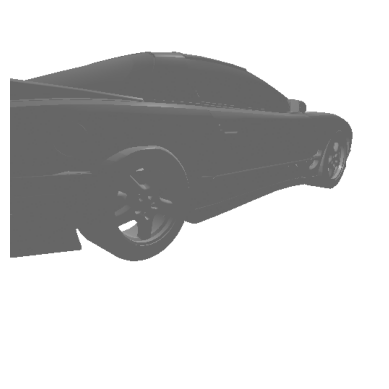

Images Name : **id10-Base_p13_dis1.95I5_angle180L2_elev15.png, --> Shape  (512, 512, 3)
image size: 8,234 bytes


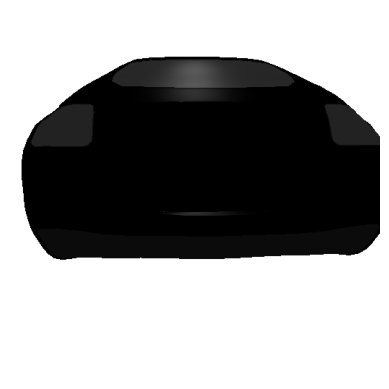

Images Name : **id14-Severe_p11_dis1.75I3_angle137L1_elev15D4.png, --> Shape  (512, 512, 3)
image size: 21,129 bytes


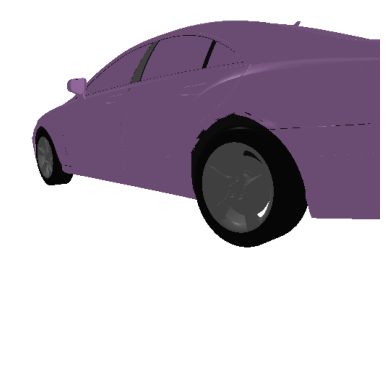

Images Name : **id2-Minor_p3_dis1.75O1_angle43L3_elev15U2.png, --> Shape  (512, 512, 3)
image size: 26,573 bytes


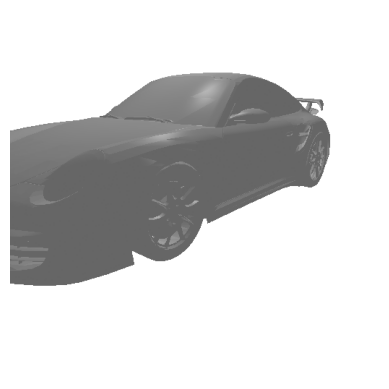

Images Name : **id10-Moderate_p11_dis1.75I1_angle137R1_elev15D2.png, --> Shape  (512, 512, 3)
image size: 7,774 bytes


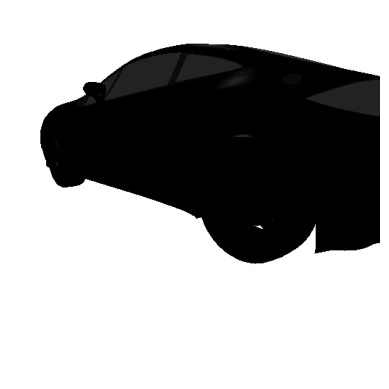

Images Name : **id6-Minor_p8_dis1.75I1_angle320L2_elev30D4.png, --> Shape  (512, 512, 3)
image size: 36,272 bytes


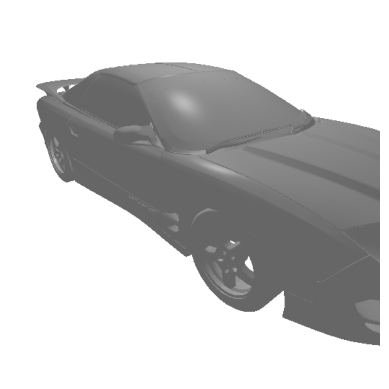

Images Name : **id10-Minor_p13_dis1.95O3_angle180R4_elev15D2.png, --> Shape  (512, 512, 3)
image size: 7,155 bytes


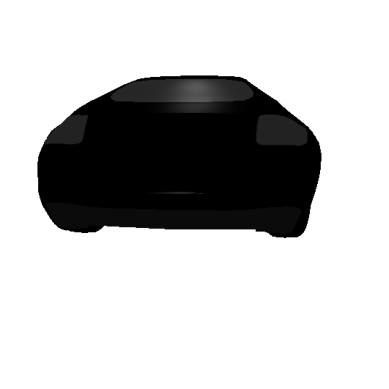

Images Name : **id6-Base_p12_dis1.75O2_angle223L1_elev15U1.png, --> Shape  (512, 512, 3)
image size: 19,830 bytes


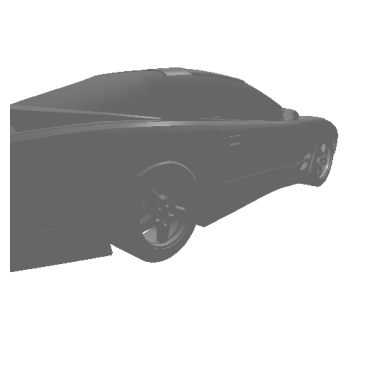

Images Name : **id12-Severe_p10_dis1.65_angle253L1_elev35D1.png, --> Shape  (512, 512, 3)
image size: 40,048 bytes


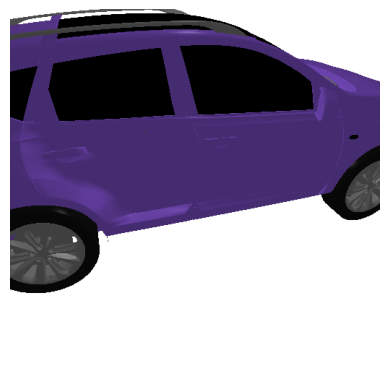

Images Name : **id12-Minor_p6_dis1.5I5_angle287R2_elev35D4.png, --> Shape  (512, 512, 3)
image size: 23,519 bytes


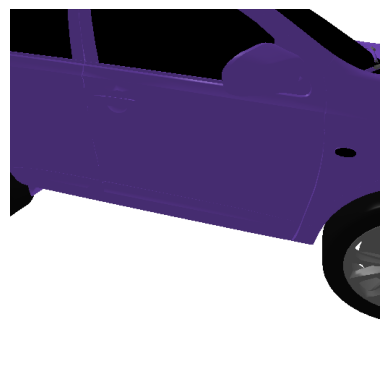

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import random

file = Table_path_['img_path'].tolist()
ims = random.choices(file, k=10)
for im in ims:
    #print(im)
    name_im = im.split('/')[-1]
    #print(name_im)
    image = cv2.imread(im)
    sZ = os.path.getsize(im)
    print(f"Images Name : **{name_im}, --> Shape ", image.shape)
    print(f"image size: {sZ:,} bytes")
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# 📁 Check Image extensions

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import random
import time

#Table_path_ = pd.read_csv('/media/SSD/Data_photogram_Pcar/Dataset_3DCar_OS.csv')
sZ_, img_path_ , extensions_, extensions_im = [], [], [], []
set_fold = list(set(Table_path_['Fold']))
set_fold.sort()
for f in set_fold:
    df_f = Table_path_[Table_path_['Fold'] == f].reset_index(drop=True)
    print(f'--->> On Processing in [ {f} ] <---')
    #img_path = df_f['img_path'].tolist()
    print(f'Number of image of {f} --->> {len(img_path)}')
    for i in range(len(df_f)):
        im = df_f['img_path'][i]
        #image = cv2.imread(im)
        try:
            Image.open(im).tobytes()    
            sZ = os.path.getsize(im)
            sZ_.append(sZ)
            img_path_.append(im)
        except IOError:
                extensions_.append(i)
                extensions_im.append(im)
                print('detect error img %s' % im)
                continue
    time.sleep(0.5)

--->> On Processing in [ fold-1 ] <---
Number of image of fold-1 --->> 46332
detect error img /home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L2/id2-Base_p11_dis1.7O1_angle137L2_elev15U4.png
detect error img /home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L3/id2-Base_p11_dis1.7O1_angle137L3_elev15.png
detect error img /home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L3/id2-Base_p11_dis1.7O1_angle137L3_elev15D1.png
detect error img /home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L3/id2-Base_p11_dis1.7O1_angle137L3_elev15D2.png
--->> On Processing in [ fold-2 ] <---
Number of image of fold-2 --->> 46332
detect error img /home/kannika/Data_photogram_car/id6/Severe/p14/dis1.95I5/Angle180L3/id6-Severe_p14_dis1.95I5_angle180L3_elev20U3.png
detect error img /home/kannika/Data_photogram_car/id6/Severe/p2/dis1.9O5/Angle0R4/id6-Severe_p2_dis1.9O5_angle0R4_elev20D2.png
--->> On Processing in [ fold-3 ] <---
Number of image of fold-3 --->>

In [21]:
##Check Image 
print(len(sZ_))
print(len(img_path_))

397954
397954


In [22]:
397967-397954

13

In [23]:
## Check image extensions
print(len(extensions_))
print(len(extensions_im))

13
13


In [24]:
extensions_

[1403,
 1404,
 1405,
 1406,
 38752,
 40979,
 23050,
 32629,
 39200,
 39232,
 39237,
 39254,
 39255]

In [31]:
extensions_im

['/home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L2/id2-Base_p11_dis1.7O1_angle137L2_elev15U4.png',
 '/home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L3/id2-Base_p11_dis1.7O1_angle137L3_elev15.png',
 '/home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L3/id2-Base_p11_dis1.7O1_angle137L3_elev15D1.png',
 '/home/kannika/Data_photogram_car/id2/Base/p11/dis1.7O1/Angle137L3/id2-Base_p11_dis1.7O1_angle137L3_elev15D2.png',
 '/home/kannika/Data_photogram_car/id6/Severe/p14/dis1.95I5/Angle180L3/id6-Severe_p14_dis1.95I5_angle180L3_elev20U3.png',
 '/home/kannika/Data_photogram_car/id6/Severe/p2/dis1.9O5/Angle0R4/id6-Severe_p2_dis1.9O5_angle0R4_elev20D2.png',
 '/home/kannika/Data_photogram_car/id8/Minor/p5/dis1.5O4/Angle73R1/id8-Minor_p5_dis1.5O4_angle73R1_elev30D1.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110@4.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/t8/dis1.75O5/Angle3

In [43]:
df0 = pd.DataFrame(list(zip(extensions_, extensions_im)),
               columns =['InDex', 'img_path'])
df0

,InDex,img_path
0,1403,/home/kannika/Data_photogram_car/id2/Base/p11/...
1,1404,/home/kannika/Data_photogram_car/id2/Base/p11/...
2,1405,/home/kannika/Data_photogram_car/id2/Base/p11/...
3,1406,/home/kannika/Data_photogram_car/id2/Base/p11/...
4,38752,/home/kannika/Data_photogram_car/id6/Severe/p1...
5,40979,/home/kannika/Data_photogram_car/id6/Severe/p2...
6,23050,/home/kannika/Data_photogram_car/id8/Minor/p5/...
7,32629,/home/kannika/Data_photogram_car/id8/Moderate/...
8,39200,/home/kannika/Data_photogram_car/id8/Moderate/...
9,39232,/home/kannika/Data_photogram_car/id8/Moderate/...


In [44]:
df0.to_csv('/media/SSD/Data_photogram_Pcar/drop_3DCar.csv')

In [46]:
df0 = pd.read_csv('/media/SSD/Data_photogram_Pcar/drop_3DCar.csv')
print(df0.shape)
df0.head()

(13, 3)


,Unnamed: 0,InDex,img_path
0,0,1403,/home/kannika/Data_photogram_car/id2/Base/p11/...
1,1,1404,/home/kannika/Data_photogram_car/id2/Base/p11/...
2,2,1405,/home/kannika/Data_photogram_car/id2/Base/p11/...
3,3,1406,/home/kannika/Data_photogram_car/id2/Base/p11/...
4,4,38752,/home/kannika/Data_photogram_car/id6/Severe/p1...


- จัดการไฟล์ 

>- '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110@4.png'

>- p15
>- dis1.8O1
>- Angle0R3

In [37]:
lst_sub = []
id_8 = Table_path_[Table_path_['ID'] =='id8'].reset_index(drop=True)
print(id_8.shape)
for i in range(len(id_8)):
    im_pth = id_8['img_path'][i]
    if 'id8-Moderate_p15_dis1.8O1_angle0R3_elev110' in im_pth:
        lst_sub.append(im_pth)

(53460, 12)


In [38]:
##** '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110@4.png'
print(len(lst_sub))
lst_sub

9


['/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D1.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D2.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D3.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110@4.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110U1.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110U2.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110U3.png',
 '/home/kannika/Data_photogram_car

#### Check image in directory

In [40]:
import glob

files_img = glob.glob(f"/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/*.png")
print(len(files_img))
files_img

9


['/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D1.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D3.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110U4.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D2.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110U1.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D4.png',
 '/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110U3.png',
 '/home/kannika/Data_photogram_car

In [41]:
set(files_img)-set(lst_sub)

{'/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D4.png'}

In [42]:
set(lst_sub)-set(files_img)

{'/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110@4.png'}

- เปลี่ยน path จาก 

``/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110@4``

เป็น 

``/home/kannika/Data_photogram_car/id8/Moderate/p15/dis1.8O1/Angle0R3/id8-Moderate_p15_dis1.8O1_angle0R3_elev110D4.png``

In [28]:
df = pd.DataFrame(list(zip(img_path_, sZ_)),
               columns =['img_path', 'image size'])
df

,img_path,image size
0,/home/kannika/Data_photogram_car/id2/Base/p1/d...,19798
1,/home/kannika/Data_photogram_car/id2/Base/p1/d...,18433
2,/home/kannika/Data_photogram_car/id2/Base/p1/d...,16660
3,/home/kannika/Data_photogram_car/id2/Base/p1/d...,15067
4,/home/kannika/Data_photogram_car/id2/Base/p1/d...,13924
...,...,...
397949,/home/kannika/Data_photogram_car/id26/Severe/p...,24642
397950,/home/kannika/Data_photogram_car/id26/Severe/p...,27203
397951,/home/kannika/Data_photogram_car/id26/Severe/p...,27969
397952,/home/kannika/Data_photogram_car/id26/Severe/p...,28430


In [30]:
df.to_csv('/media/SSD/Data_photogram_Pcar/sZ_3DCar.csv')

### Check size of images

In [2]:
df_sZ = pd.read_csv('/media/SSD/Data_photogram_Pcar/sZ_3DCar.csv')
print(df_sZ.shape)
df_sZ.head()

(397954, 3)


,Unnamed: 0,img_path,image size
0,0,/home/kannika/Data_photogram_car/id2/Base/p1/d...,19798
1,1,/home/kannika/Data_photogram_car/id2/Base/p1/d...,18433
2,2,/home/kannika/Data_photogram_car/id2/Base/p1/d...,16660
3,3,/home/kannika/Data_photogram_car/id2/Base/p1/d...,15067
4,4,/home/kannika/Data_photogram_car/id2/Base/p1/d...,13924


In [3]:
df_sZ0 = df_sZ.sort_values(by=['image size'])
df_sZ0.head()

,Unnamed: 0,img_path,image size
158265,158265,/home/kannika/Data_photogram_car/id10/Minor/p1...,5069
157698,157698,/home/kannika/Data_photogram_car/id10/Minor/p1...,5096
157779,157779,/home/kannika/Data_photogram_car/id10/Minor/p1...,5099
158346,158346,/home/kannika/Data_photogram_car/id10/Minor/p1...,5120
158427,158427,/home/kannika/Data_photogram_car/id10/Minor/p1...,5123


Images Name : **id10-Minor_p1_dis1.9O2_angle0_elev8D4.png, --> Shape  (512, 512, 3)
image size: 5,069 bytes


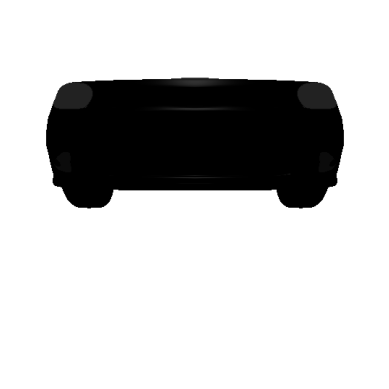

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import random

#ims = random.choices(file, k=5)
#for im in ims:
    #print(im)
    #name_im = im.split('/')[-1]
    #print(name_im)
lst_img = df_sZ0['img_path'].tolist()     
im = lst_img[0]
name_im = im.split('/')[-1]
image = cv2.imread(im)
sZ = os.path.getsize(im)
print(f"Images Name : **{name_im}, --> Shape ", image.shape)
print(f"image size: {sZ:,} bytes")
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
df_sZ0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397954 entries, 158265 to 285264
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  397954 non-null  int64 
 1   img_path    397954 non-null  object
 2   image size  397954 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 12.1+ MB


In [9]:
df_sZ_ = df_sZ[df_sZ['image size'] < 10000]
print(df_sZ_.shape)
df_sZ_

(33705, 3)


,Unnamed: 0,img_path,image size
92662,92662,/home/kannika/Data_photogram_car/id8/Base/p1/d...,9896
92671,92671,/home/kannika/Data_photogram_car/id8/Base/p1/d...,9954
92680,92680,/home/kannika/Data_photogram_car/id8/Base/p1/d...,9983
92707,92707,/home/kannika/Data_photogram_car/id8/Base/p1/d...,9924
92725,92725,/home/kannika/Data_photogram_car/id8/Base/p1/d...,9910
...,...,...,...
375665,375665,/home/kannika/Data_photogram_car/id26/Moderate...,8317
375671,375671,/home/kannika/Data_photogram_car/id26/Moderate...,9819
375672,375672,/home/kannika/Data_photogram_car/id26/Moderate...,9198
375673,375673,/home/kannika/Data_photogram_car/id26/Moderate...,8401


### 📁 จัดการไฟล์ที่เสียหาย ไม่เอามาใช้เป็น Data set

In [48]:
df = pd.read_csv('/media/SSD/Data_photogram_Pcar/sZ_3DCar.csv')
print(df.shape)
df.head()

(397954, 3)


,Unnamed: 0,img_path,image size
0,0,/home/kannika/Data_photogram_car/id2/Base/p1/d...,19798
1,1,/home/kannika/Data_photogram_car/id2/Base/p1/d...,18433
2,2,/home/kannika/Data_photogram_car/id2/Base/p1/d...,16660
3,3,/home/kannika/Data_photogram_car/id2/Base/p1/d...,15067
4,4,/home/kannika/Data_photogram_car/id2/Base/p1/d...,13924


In [50]:
lst_path = df0['img_path'].tolist()
#lst_path
Table_path__ = Table_path_.drop(Table_path_[Table_path_.img_path.isin(lst_path)].index)
Table_path__ = Table_path__.reset_index(drop=True)
print(Table_path__.shape)
Table_path__.head()

(397954, 12)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Damage,p,FileName,distance,Angle,img_path,Fold,path_train
0,0,0,0,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
1,1,1,1,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D1.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
2,2,2,2,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D2.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
3,3,3,3,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D3.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
4,4,4,4,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D4.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...


In [55]:
Table_path_upd = Table_path__.iloc[:,3:]
print(Table_path_upd.shape)
Table_path_upd.head()

(397954, 9)


,ID,Damage,p,FileName,distance,Angle,img_path,Fold,path_train
0,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
1,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D1.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
2,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D2.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
3,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D3.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...
4,id10,Base,p1,id10-Base_p1_dis1.9_angle0_elev8D4.png,dis1.9,Angle0,/home/kannika/Data_photogram_car/id10/Base/p1/...,fold-4,/media/SSD/Data_photogram_Pcar/8-Fold/id10-Bas...


In [56]:
Table_path_upd.to_csv('/media/SSD/Data_photogram_Pcar/Dataset_3DCar_OS_solu3.csv')